# URBANCLAP MARKETING ANALYTICS ASSIGNMENT

## Submitted by- Chaitali Bansal

*Data field for variable source has been converted as A=1, B=2, C=3, D=4 because of some problem with the system*

### Data Preperation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from __future__ import division
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("Urbanclap.csv",header=0)

In [4]:
#Rename columns 
df.columns=['T_ID','P_ID','DOB','DOSR','Source','Slot']

In [5]:
#Convert Date of booking and service requested to datetime datatype
df.DOB = pd.to_datetime(df['DOB'])
df.DOSR = pd.to_datetime(df['DOSR'])

## 1. NEW CUSTOMER BY MONTH

In [6]:
df1=df.groupby(df['P_ID'])['DOB'].min() #First booking of each User

In [7]:
df2=df1.dt.month
df2=pd.DataFrame({'P_ID':df2.index, 'Month':df2.values})

In [8]:
df2=df2.groupby(df2['Month'])['P_ID'].count() #Number of bookings in each month

In [9]:
df2=pd.DataFrame({'Month':df2.index, 'New_Customer':df2.values})

In [10]:
df2.loc[-1] = df2.loc[11]  # adding a row
df2.index = df2.index + 1  # shifting index
df2.sort_index(inplace=True)

In [11]:
df3=df2[:-1]

In [12]:
df3 #Month and no of new customer

,Month,New_Customer
0,12,2424
1,1,1892
2,2,1549
3,3,1490
4,4,1346
5,5,1264
6,6,1273
7,7,1208
8,8,1120
9,9,1020


In [13]:
label = ('DEC-17','JAN-18', 'FEB-18', 'MARCH-18', 'APRIL-18', 'MAY-18', 'JUNE-18', 'JULY-18', 'AUGUST-18',
         'SEPT-18', 'OCT-18', 'NOV-18')

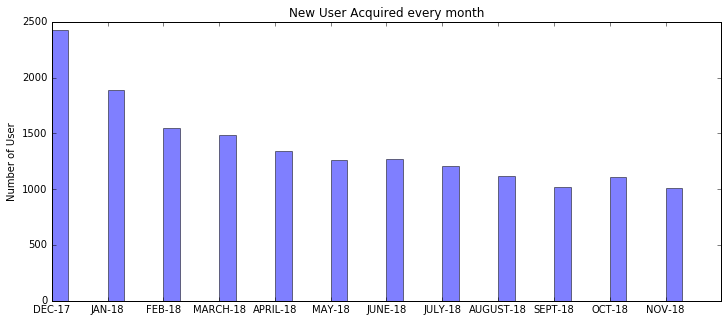

In [14]:
y_pos = np.arange(len(label))
plt.figure(figsize=(12,5)) 
plt.bar(y_pos, df3.New_Customer, align='edge', width=0.3,alpha=0.5)
plt.xticks(y_pos, label)
plt.title('New User Acquired every month')
plt.ylabel('Number of User')
plt.show()

It is clearly seen that number of new customers acquired are decreasing with time. 

## 2. 30 DAY REPEAT RATE( For December 2017)

In [15]:
df5=df
df6=df

In [16]:
df5=df5.loc[df5.groupby("P_ID")["DOB"].idxmin()]
indexname=df5.index
#First Booking of each user

In [17]:
df6=df6.drop(indexname)

In [18]:
df6.rename(columns={'DOB': 'Date2'}, inplace=True)


In [19]:
df6=df6.loc[df6.groupby("P_ID")["Date2"].idxmin()]
#second Booking of each user

In [20]:
s1 = pd.merge(df5, df6, how='left', on=['P_ID'])

In [21]:
s2=s1[s1.DOB.dt.month==12]
#Taking only user with first booking in month of december

In [22]:
Total=s2.P_ID.count()
#Total number of user acquired in december

In [23]:
s2=s2.dropna()

In [24]:
s3= s2['Date2'].subtract(s2['DOB'])
#Difference between first and second booking

In [25]:
c=0

In [26]:
for x in s3:
    if x.days<=30:
        c=c+1
#count the number of user with 30 day or less difference between first and second booking

In [27]:
print (c/Total*100)
#percentage of 30 day repeat rate

16.831683168316832


#### Therefore the 30 day Repeat Rate perfect for December 2017 Customers is 16.8 Approximately.


# 3. 90 DAY REPEAT RATE( For Jan, Feb and March 2018)

In [28]:
s4=s1[(s1.DOB.dt.month==1) | (s1.DOB.dt.month==2) | (s1.DOB.dt.month==3)]
##Taking for months of Jan, Feb and March only

In [29]:
Total1=s4.P_ID.count()
#Total Number of user acquired

In [30]:
s4=s4.dropna()

In [31]:
s5= s4['Date2'].subtract(s4['DOB'])
#Difference between fist and second booking

In [32]:
m=0

In [33]:
for x in s5:
    if x.days<=90:
        m=m+1
#count the number of user with 90 day or less difference between first and second booking

In [34]:
print (m/Total1*100)
#Percentage of 90 day repeat rate in month of Jan, feb and march

20.74629892516731


#### Therefore the 90 day Repeat Rate perfect for January, February and March 2018 Customers is 20.7 Approximately.


## 4. LOGISTIC REGRESSION MODEL TO PREDICT 90 DAYS REPEAT RATE FOR CUSTOMER ACQUIRED IN NOVEMBER 2018 


In [35]:
p1=s1

In [36]:
p1['Diff_bw_booking_request']= p1['DOSR_x'].subtract(p1['DOB']).dt.days
#Calculating difference between the date of booking and date of service requested

In [37]:
train_data=p1[p1.DOB.dt.month!=11]
#selecting data for user acquired in month of november as training

In [38]:
test_data=p1[p1.DOB.dt.month==11]
#selecting rest of data as training

In [39]:
train_data=train_data.dropna()

In [40]:
train_data['RepeatRate']= train_data['Date2'].subtract(train_data['DOB'])
#Difference between the first and second booking

In [41]:
train_data['Label']=train_data.RepeatRate.dt.days<=90
#selecting only those with difference less than or equal to 90

In [42]:
train_data['Label']=train_data['Label'].astype(int)

In [43]:
train_data=train_data.drop(['T_ID_x', 'T_ID_y'], axis=1)

In [44]:
feature_cols = ['Slot_x', 'Diff_bw_booking_request','Source_x']
x_train = train_data[feature_cols] # Features
y_train = train_data.Label # Target variable

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
x_train = sc.fit_transform(x_train)

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
feature_cols = ['Slot_x', 'Diff_bw_booking_request','Source_x']
x_test= test_data[feature_cols]

In [49]:
y_pred = classifier.predict(x_test)

In [50]:
test_data['Result']=y_pred

C:\Users\Chaitali Bansal\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
feature_col = ['T_ID_x','P_ID','DOB','Slot_x', 'Diff_bw_booking_request','Source_x','Result']

In [52]:
FinalResult= test_data[feature_col]

In [53]:
FinalResult
#Display of customers acquired in month of November with the possibility of 90 day repeat rate as variable Result

,T_ID_x,P_ID,DOB,Slot_x,Diff_bw_booking_request,Source_x,Result
1,DYDMF,2,2018-11-10,11,3,3,1
7,TDVFU,8,2018-11-29,10,0,3,1
20,QIYRA,21,2018-11-27,8,0,2,1
61,KGYWP,62,2018-11-11,14,1,3,1
84,QFPHG,85,2018-11-04,6,2,4,1
93,UNMBP,94,2018-11-22,10,1,4,1
115,LOCOR,116,2018-11-17,14,4,3,0
204,SKPXC,205,2018-11-23,17,2,2,0
218,HHJQP,219,2018-11-13,12,3,4,0
247,CFJKQ,248,2018-11-24,19,0,2,0


###### 1- Represents that person is likely to buy next within 90 days 
##### 0- represents that person is not likely to buy within next 90 days.

In [54]:
Noofrepeatbuyer=FinalResult[FinalResult['Result']==1]['Result'].count()
#Total number customer acquired in Nov with Result as likely to buy within next 90 days

In [55]:
TotalBuyer=FinalResult['Result'].count()
#Total number of customers acquired in Nov

In [56]:
print (Noofrepeatbuyer/TotalBuyer*100)
#Predicted 90 Day repeat Rate for customer acquired in Nov

45.812807881773395


#### The predicted 90 day Repeat Rate for customers acquired in November 2018 is 45.8 Approximately.

## DISTRIBUTION OF USERS BY FREQUENCY OF THEIR 90 DAY REPEAT

In [57]:
k1=df

In [58]:
k2 = pd.merge(k1,df5,on='P_ID', how='left')
#Joining Dataframe with dataframe representing first date of booking for each User

In [59]:
k2['request_diff']= k2['DOB_x'].subtract(k2['DOB_y']).dt.days
#Difference between every date of booking with first date of booking of each user

In [60]:
k3=k2[k2.request_diff<=90]
#selecting entries with difference less than 90

In [61]:
k4=k3.groupby('P_ID')['P_ID'].count()
#No of booking by each user

In [62]:
k5=pd.DataFrame({'P_ID':k4.index, 'No_of_Booking':k4.values})

In [63]:
k6=k5.groupby('No_of_Booking')['P_ID'].count()
#No of user with no of Booking 
#Like 1 user booked only 13 times in first 90 days

In [64]:
k7=k6.values

In [65]:
label1 = ('1','2', '3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16')
freq_series = pd.Series.from_array(k7)

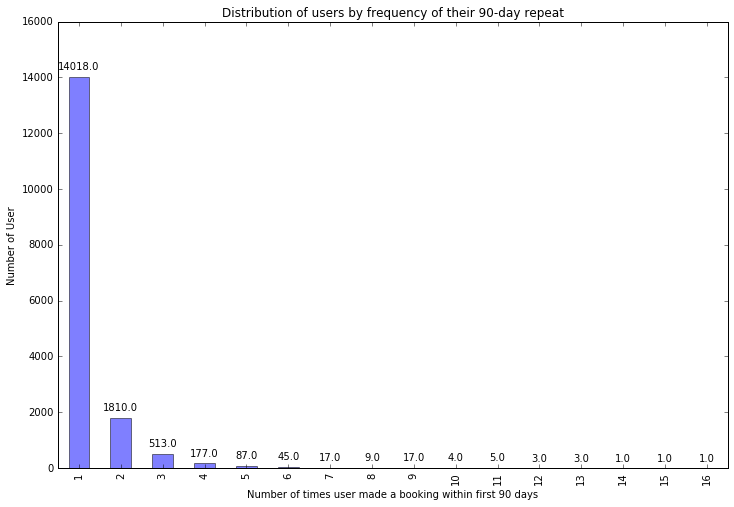

In [66]:
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar',alpha=0.5)
ax.set_title('Distribution of users by frequency of their 90-day repeat')
ax.set_ylabel('Number of User')
ax.set_xlabel('Number of times user made a booking within first 90 days')
ax.set_xticklabels(label1)

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va = 'bottom'
    label = y_value
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.
plt.show()